<a href="https://colab.research.google.com/github/juanxo90/basico_python/blob/main/Libreta6_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalamos librerias

In [1]:
%%capture
!pip install geopandas rtree pygeos

# Importamos las librerias a usar

In [2]:
import geopandas as gpd
import pandas as pd

# Obtenemos los datos

In [4]:
url = 'https://raw.githubusercontent.com/juanxo90/basico_python/main/data/geocrono.csv'

df = pd.read_csv(url)
df.head(3)

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,...,TIPO_EDAD,HEREDADOS,REFERENCIA,UNIDAD,LOC_TIPO,OBSERVA,PDF,CARTA50,CARTA250,TABLACRONO
0,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,Edad de cristalización,NaN,"Helbig et al., 2012",Litodema Chazumba,NaN,NaN,NaN,PETLALCINGO E14-B84,ORIZABA E14-6,http://www.stratigraphy.org/ICSchart/Chronostr...
1,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,Edad de cristalización,NaN,"Montoya-Lopera et al., 2020",Batolito Sinaloa,NaN,NaN,https://portal.sgm.gob.mx/GeoInfoMex_EdadesIso...,SAN JUAN F13-A16,MAZATLAN F13-1,http://www.stratigraphy.org/ICSchart/Chronostr...
2,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,Edad de enfriamiento,NaN,"Solís-Pichardo (en Morán-Zenteno et al., 2000)",NaN,NaN,NaN,NaN,SANTA MARIA HUATULCO OAXACA D14-B19,PUERTO ESCONDIDO D14-3,http://www.stratigraphy.org/ICSchart/Chronostr...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6402 entries, 0 to 6401
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          0 non-null      float64
 1   description   0 non-null      float64
 2   timestamp     0 non-null      float64
 3   begin         0 non-null      float64
 4   end           0 non-null      float64
 5   altitudeMode  0 non-null      float64
 6   tessellate    6402 non-null   int64  
 7   extrude       6402 non-null   int64  
 8   visibility    6402 non-null   int64  
 9   drawOrder     0 non-null      float64
 10  icon          0 non-null      float64
 11  DES_CLAV      6401 non-null   object 
 12  RANGO_MA      6401 non-null   object 
 13  MUESTRA       6401 non-null   object 
 14  ESTADO        6117 non-null   object 
 15  LONG_         6402 non-null   float64
 16  LAT           6402 non-null   float64
 17  TIPO_ROCA     6267 non-null   object 
 18  ROCA          6331 non-null 

In [9]:
df_clean = (
    df.copy()
    .drop(
        columns = ['Name', 'description', 'timestamp',
                   'begin', 'end', 'altitudeMode', 
                   'drawOrder', 'icon', 'tessellate',
                   'extrude', 'visibility']
    )
)
df_clean.head(3)

,DES_CLAV,RANGO_MA,MUESTRA,ESTADO,LONG_,LAT,TIPO_ROCA,ROCA,METODO,MINERAL,...,TIPO_EDAD,HEREDADOS,REFERENCIA,UNIDAD,LOC_TIPO,OBSERVA,PDF,CARTA50,CARTA250,TABLACRONO
0,Pérmico-Cisuraliano,272.3 - 298.9,MH-73,Oaxaca,-97.699722,18.162778,Metamórfica,Esquisto micáceo (metapsamita),U-Pb,Circón,...,Edad de cristalización,NaN,"Helbig et al., 2012",Litodema Chazumba,NaN,NaN,NaN,PETLALCINGO E14-B84,ORIZABA E14-6,http://www.stratigraphy.org/ICSchart/Chronostr...
1,Paleógeno-Paleoceno,56 - 66,SD-107,Sinaloa,-106.269306,23.954953,Plutónica,Granodiorita,U-Pb,Zircón,...,Edad de cristalización,NaN,"Montoya-Lopera et al., 2020",Batolito Sinaloa,NaN,NaN,https://portal.sgm.gob.mx/GeoInfoMex_EdadesIso...,SAN JUAN F13-A16,MAZATLAN F13-1,http://www.stratigraphy.org/ICSchart/Chronostr...
2,Neógeno-Mioceno,5.333 - 23.03,H250,Oaxaca,-96.033340,15.933335,Plutónica,Tonalita,Rb-Sr,Biotita-Roca total,...,Edad de enfriamiento,NaN,"Solís-Pichardo (en Morán-Zenteno et al., 2000)",NaN,NaN,NaN,NaN,SANTA MARIA HUATULCO OAXACA D14-B19,PUERTO ESCONDIDO D14-3,http://www.stratigraphy.org/ICSchart/Chronostr...


In [14]:
gdf_crono = gpd.GeoDataFrame(df_clean,
                             geometry=gpd.points_from_xy(
                                 df_clean.LONG_,
                                 df_clean.LAT,
                             ))

In [18]:
mask = gdf_crono.LONG_ > -70
gdf_crono[mask]

,DES_CLAV,RANGO_MA,MUESTRA,ESTADO,LONG_,LAT,TIPO_ROCA,ROCA,METODO,MINERAL,...,HEREDADOS,REFERENCIA,UNIDAD,LOC_TIPO,OBSERVA,PDF,CARTA50,CARTA250,TABLACRONO,geometry
6324,Cretácico Inferior-Aptiano,113 - 125,Xo0222,Guerrero,0.0,0.0,Metamórfica,Ortogneis migmatizado,U-Pb,Zircón,...,NaN,"Estrada-Carmona et al., 2016",NaN,Complejo Xolapa,Coordenadas Estimadas,NaN,ACAPULCO E14-C57,ACAPULCO E14-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (0.00000 0.00000)
6325,Cretácico Inferior-Aptiano,113 - 125,Xo0230,Guerrero,0.0,0.0,Metamórfica,Ortogneis migmatizado,U-Pb,Zircón,...,NaN,"Estrada-Carmona et al., 2016",NaN,Complejo Xolapa,Coordenadas Estimadas,NaN,ACAPULCO E14-C57,ACAPULCO E14-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (0.00000 0.00000)
6326,Cretácico Inferior-Barremiano,125 - 129.4,Rb-105,Guerrero,0.0,0.0,Metamórfica,Migmatita (leucosoma),U-Pb,Zircón,...,NaN,"Estrada-Carmona et al., 2016",NaN,Complejo Xolapa,Coordenadas Estimadas,NaN,SAN MARCOS E14-C58,ACAPULCO E14-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (0.00000 0.00000)
6327,Paleógeno-Eoceno,33.9 - 56,Rb-109,Guerrero,0.0,0.0,Metamórfica,Migmatita,U-Pb,Zircón,...,NaN,"Estrada-Carmona et al., 2016",NaN,Complejo Xolapa,Coordenadas Estimadas,NaN,SAN MARCOS E14-C58,ACAPULCO E14-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (0.00000 0.00000)
6328,Cretácico Inferior-Aptiano,113 - 125,Rb-109,Guerrero,0.0,0.0,Migmatita,Migmatita,U-Pb,Zircón,...,NaN,"Estrada-Carmona et al., 2016",NaN,Complejo Xolapa,Coordenadas Estimadas,NaN,SAN MARCOS E14-C58,ACAPULCO E14-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (0.00000 0.00000)
6334,Cretácico Inferior-Aptiano,113 - 125,Rb-76,Guerrero,0.0,0.0,Metamórfica,Ortogneis migmatizado,U-Pb,Zircón,...,NaN,"Estrada-Carmona et al., 2016",NaN,Complejo Xolapa,Coordenadas Estimadas,NaN,ACAPULCO E14-C57,ACAPULCO E14-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (0.00000 0.00000)
6335,Cretácico Inferior-Hauteriviano,129.4 - 132.9,Rb-76,Guerrero,0.0,0.0,Metamórfica,Ortogneis migmatizado,U-Pb,Zircón,...,NaN,"Estrada-Carmona et al., 2016",NaN,Complejo Xolapa,Coordenadas Estimadas,NaN,ACAPULCO E14-C57,ACAPULCO E14-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (0.00000 0.00000)
6336,Cretácico Inferior-Valanginiano,132.9 - 139.8,Rb-71,Guerrero,0.0,0.0,Metamórfica,Ortogneis migmatizado,U-Pb,Zircón,...,NaN,"Estrada-Carmona et al., 2016",NaN,Complejo Xolapa,Coordenadas Estimadas,NaN,ACAPULCO E14-C57,ACAPULCO E14-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (0.00000 0.00000)
6337,Cretácico Inferior-Aptiano,113 - 125,Rb-71,Guerrero,0.0,0.0,Metamórfica,Ortogneis migmatizado,U-Pb,Zircón,...,NaN,"Estrada-Carmona et al., 2016",NaN,Complejo Xolapa,Coordenadas Estimadas,NaN,ACAPULCO E14-C57,ACAPULCO E14-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (0.00000 0.00000)


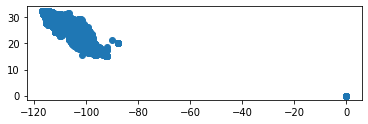

In [15]:
gdf_crono.plot()